<a href="https://colab.research.google.com/github/CristianAyala/infovis/blob/main/TP_FINAL_AYALA_COCA_NETFLIX_ITBA_VISUALIZACION_DE_LA_INFORMACION_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.itba.edu.ar/wp-content/uploads/2021/08/ITBA-logo.png" width="200">

<h1><center>Maestría en Management & Analytics</center></h1>
<h2><center>TP: Visualización de la información</center></h2>
<h1><center>Netflix (TOP 10 de Peliculas y Series) Argentina, Uruguay, Paraguay y Bolivia</center></h1>
<h2><center>Alumnos: Ayala Cristian / Coca Ivan</center></h2>

In [ ]:
# @title
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar el dataset
df = pd.read_csv('netflix.csv',encoding='latin-1')

# Diccionario de datos del dataset
data_dictionary = {
    "country_name": "Nombre del país donde se recopila el ranking (ej., Uruguay, Argentina)",
    "country_iso2": "Código ISO de 2 letras para el país (ej., UY, AR)",
    "week": "Fecha de la semana del ranking en formato AAAA-MM-DD",
    "category": "Tipo de contenido: Films o Series",
    "weekly_rank": "Posición en el top 10 durante esa semana (1 a 10, donde 1 es la más alta)",
    "show_title": "Título de la película o serie",
    "season_title": "Título de la temporada (aplicable solo a series, en otros casos es N/A)",
    "cumulative_weeks_in_top_10": "Número total de semanas acumuladas en el top 10 para cada título"
}

print("Diccionario de Datos:")
for key, value in data_dictionary.items():
    print(f"{key}: {value}")

Diccionario de Datos:
country_name: Nombre del país donde se recopila el ranking (ej., Uruguay, Argentina)
country_iso2: Código ISO de 2 letras para el país (ej., UY, AR)
week: Fecha de la semana del ranking en formato AAAA-MM-DD
category: Tipo de contenido: Films o Series
weekly_rank: Posición en el top 10 durante esa semana (1 a 10, donde 1 es la más alta)
show_title: Título de la película o serie
season_title: Título de la temporada (aplicable solo a series, en otros casos es N/A)
cumulative_weeks_in_top_10: Número total de semanas acumuladas en el top 10 para cada título


In [ ]:
# @title
# Vista rápida del dataset
print("Vista previa de los datos:")
print(df.head())

print("\nInformación general del dataset:")
print(df.info())

Vista previa de los datos:
  country_name country_iso2        week category  weekly_rank   show_title  \
0      Uruguay           UY  2024-11-03    Films            1   Don't Move   
1      Uruguay           UY  2024-11-03    Films            2     Time Cut   
2      Uruguay           UY  2024-11-03    Films            3       Let Go   
3      Uruguay           UY  2024-11-03    Films            4  Family Pack   
4      Uruguay           UY  2024-11-03    Films            5   Hijack '93   

  season_title  cumulative_weeks_in_top_10  
0          NaN                           2  
1          NaN                           1  
2          NaN                           1  
3          NaN                           2  
4          NaN                           1  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      ---

In [ ]:
# @title
# Revisar valores únicos y estadísticos básicos
print("\nValores únicos por columna:")
print(df.nunique())

print("\nEstadísticas descriptivas:")
print(df.describe())


Valores únicos por columna:
country_name                     5
country_iso2                     5
week                           175
category                         2
weekly_rank                     10
show_title                    1701
season_title                   685
cumulative_weeks_in_top_10     100
dtype: int64

Estadísticas descriptivas:
        weekly_rank  cumulative_weeks_in_top_10
count  17500.000000                17500.000000
mean       5.500000                    4.397771
std        2.872363                    9.068452
min        1.000000                    1.000000
25%        3.000000                    1.000000
50%        5.500000                    2.000000
75%        8.000000                    3.000000
max       10.000000                  100.000000



Títulos con más semanas acumuladas en el top 10:
show_title
Pablo Escobar, el patrón del mal    100
Pasión de Gavilanes                  82
Shrek                                54
Yo soy Betty, la fea                 54
Boys Over Flowers                    49
Café con aroma de mujer              47
Sing                                 34
Til Money Do Us Part                 34
The Queen of Flow                    27
True Beauty                          25
Name: cumulative_weeks_in_top_10, dtype: int64


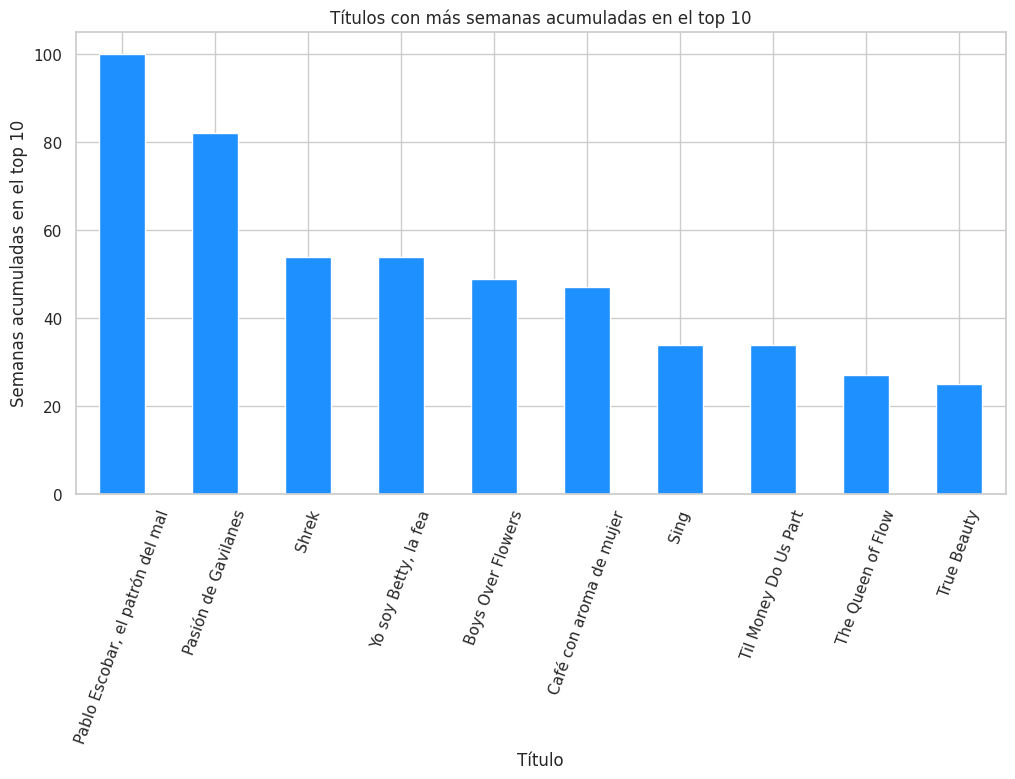

In [43]:
# @title
# Análisis de popularidad de títulos (semanas en el top 10)
top_titles = df.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False).head(10)
print("\nTítulos con más semanas acumuladas en el top 10:")
print(top_titles)

# Gráfico de barras de los títulos más populares por semanas acumuladas en el top 10
plt.figure(figsize=(12, 6))
top_titles.plot(kind='bar', color='dodgerblue')
plt.title('Títulos con más semanas acumuladas en el top 10')
plt.xlabel('Título')
plt.ylabel('Semanas acumuladas en el top 10')
plt.xticks(rotation=70)
plt.show()

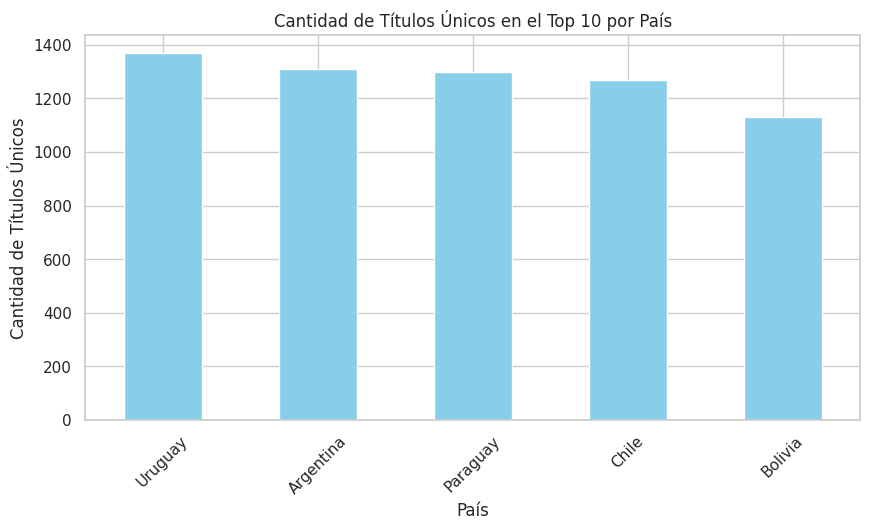

In [ ]:
# @title
# Número de títulos únicos en el top 10 por país
unique_titles_by_country = df.groupby('country_name')['show_title'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
unique_titles_by_country.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Títulos Únicos en el Top 10 por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Títulos Únicos')
plt.xticks(rotation=45)
plt.show()

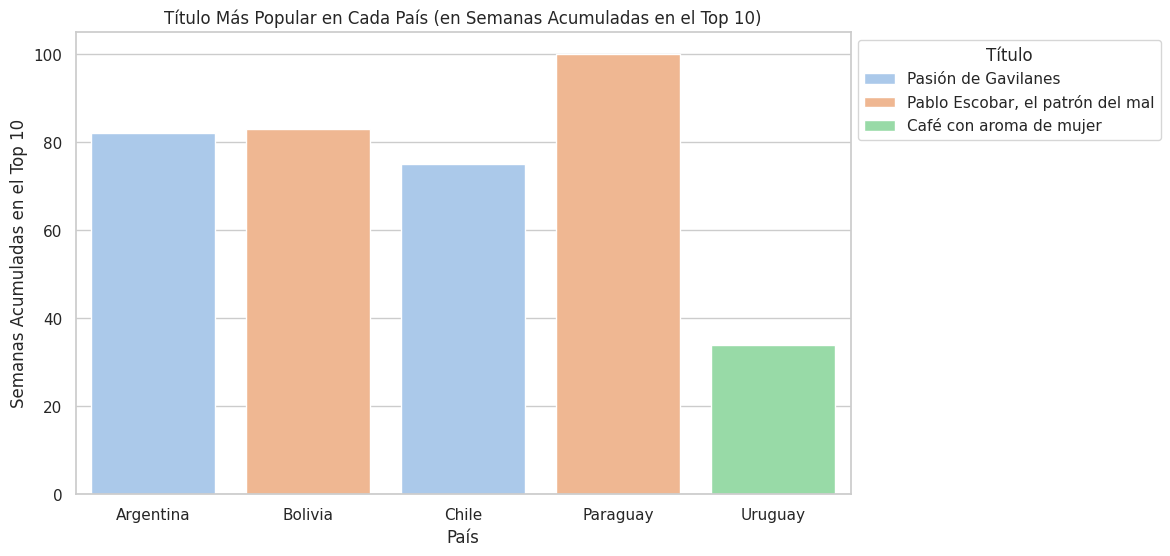

In [ ]:
# @title
# Título con más semanas en el top 10 por país
top_titles_by_country = df.groupby(['country_name', 'show_title'])['cumulative_weeks_in_top_10'].max().reset_index()
top_titles_by_country = top_titles_by_country.sort_values(['country_name', 'cumulative_weeks_in_top_10'], ascending=[True, False]).groupby('country_name').head(1)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles_by_country, x='country_name', y='cumulative_weeks_in_top_10', hue='show_title', dodge=False, palette='pastel')
plt.title('Título Más Popular en Cada País (en Semanas Acumuladas en el Top 10)')
plt.xlabel('País')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.legend(title='Título', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

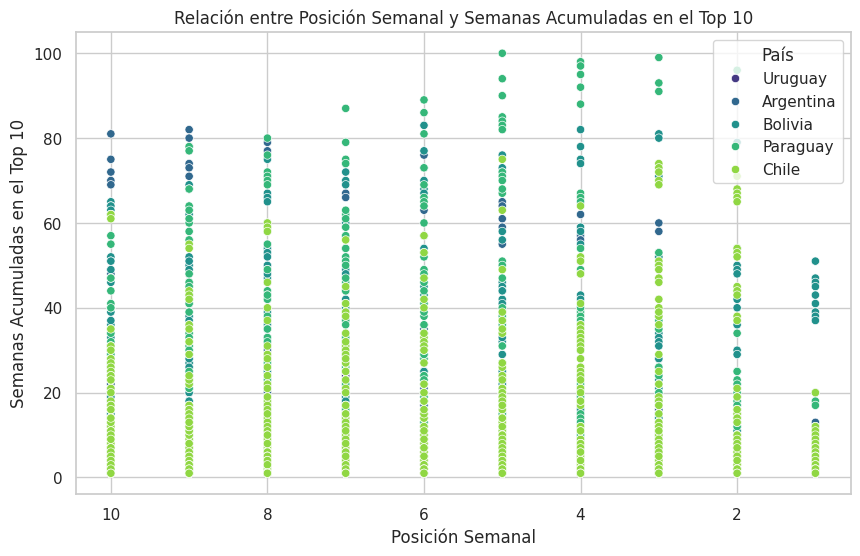

In [ ]:
# @title
# Scatter plot entre weekly_rank y cumulative_weeks_in_top_10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weekly_rank', y='cumulative_weeks_in_top_10', hue='country_name', palette='viridis')
plt.title('Relación entre Posición Semanal y Semanas Acumuladas en el Top 10')
plt.xlabel('Posición Semanal')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.legend(title='País')
plt.gca().invert_xaxis()  # Invertir eje para que 1 esté a la izquierda
plt.show()

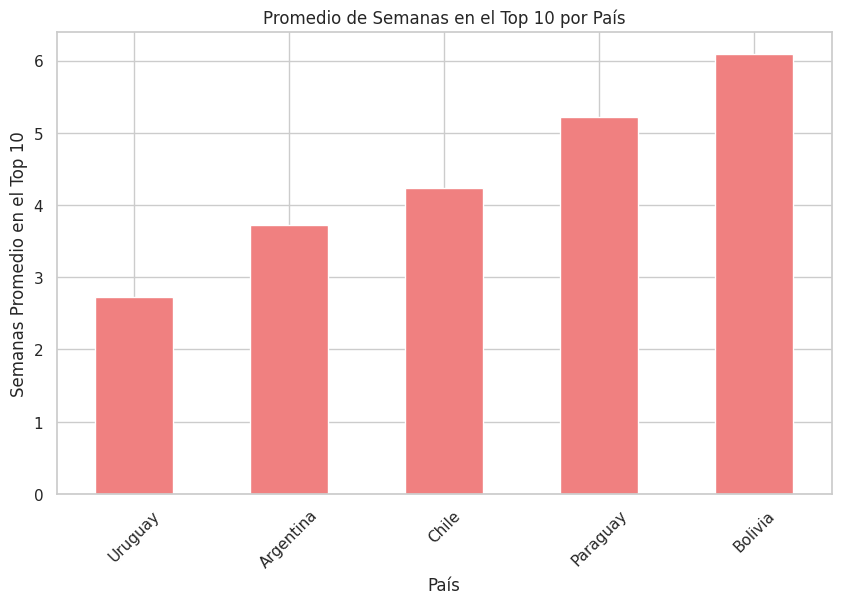

In [ ]:
# @title
# Promedio de semanas en el top 10 por país
avg_weeks_in_top_10 = df.groupby('country_name')['cumulative_weeks_in_top_10'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_weeks_in_top_10.plot(kind='bar', color='lightcoral')
plt.title('Promedio de Semanas en el Top 10 por País')
plt.xlabel('País')
plt.ylabel('Semanas Promedio en el Top 10')
plt.xticks(rotation=45)
plt.show()

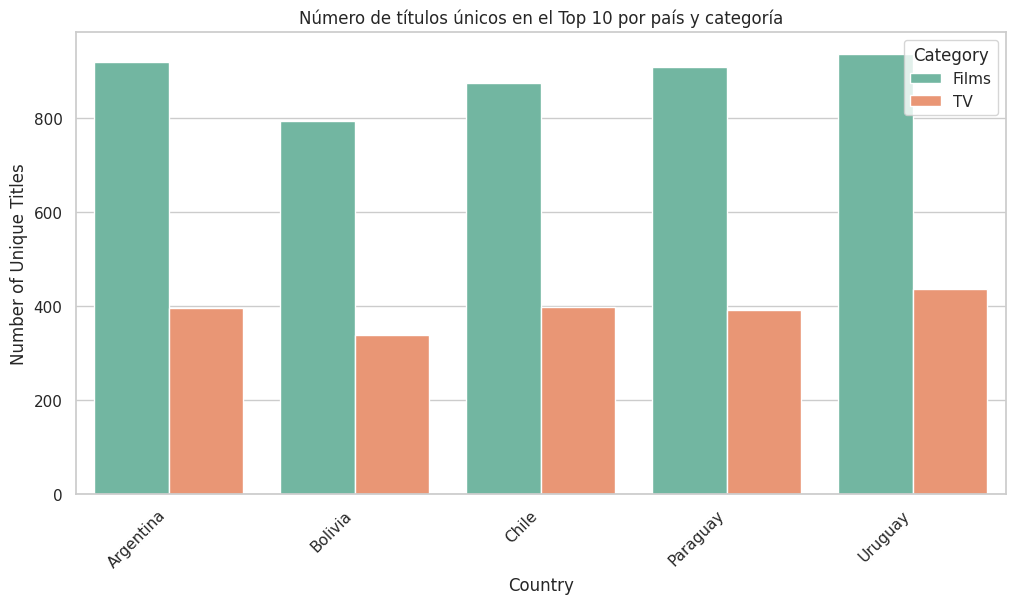

In [ ]:
# @title
# Group by country and category, count unique titles
country_category_counts = df.groupby(['country_name', 'category'])['show_title'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=country_category_counts, x='country_name', y='show_title', hue='category', palette='Set2')
plt.title('Número de títulos únicos en el Top 10 por país y categoría')
plt.xlabel('Country')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.show()

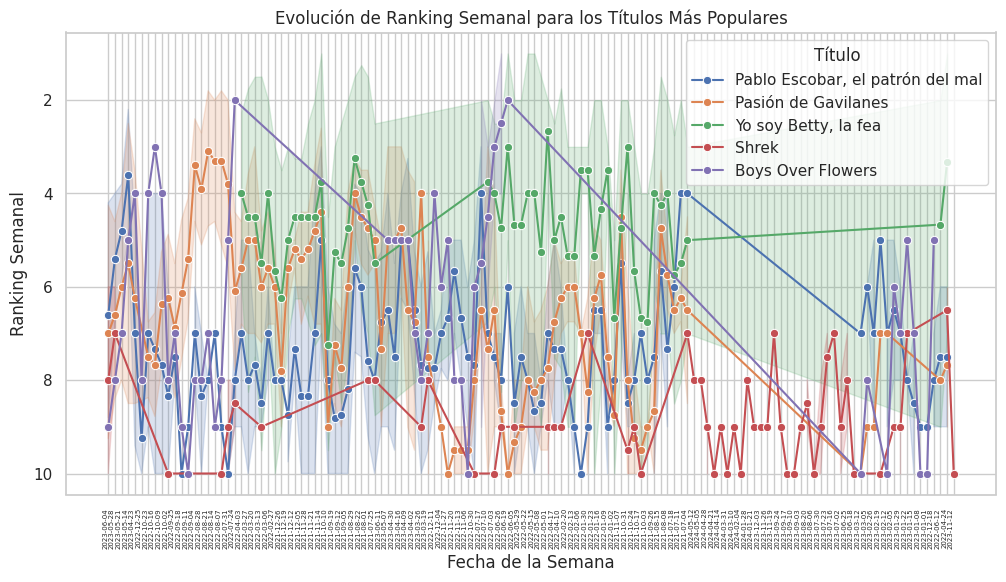

In [41]:
# @title
#¿Cómo varía la posición semanal (weekly_rank) a lo largo del tiempo para los títulos más populares?
#Gráfico de Líneas: El gráfico de puede mostrar la evolución del ranking semanal de un título en el top 10, permitiendo ver tendencias de popularidad a lo largo del tiempo.
# Seleccionar los 5 títulos con más semanas acumuladas en el top 10
top_titles = df.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False).head(5).index
df_top_titles = df[df['show_title'].isin(top_titles)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_titles, x='week', y='weekly_rank', hue='show_title', marker="o")
plt.gca().invert_yaxis()  # Colocar el ranking 1 en la parte superior
plt.title('Evolución de Ranking Semanal para los Títulos Más Populares')
plt.xlabel('Fecha de la Semana')
plt.ylabel('Ranking Semanal')
plt.xticks(rotation=90, ha='right',fontsize=5)
plt.legend(title='Título')
plt.show()

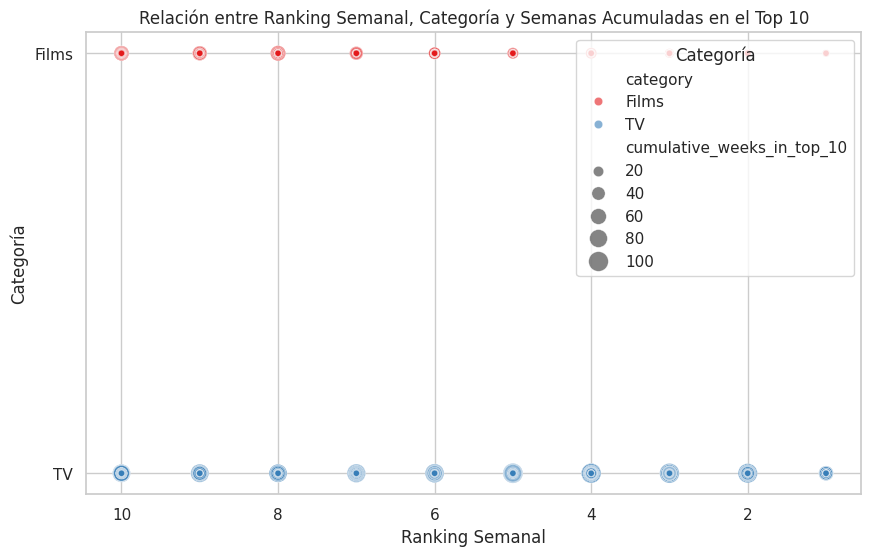

In [ ]:
# @title
#¿Qué relación hay entre el tamaño de la audiencia (número de semanas en el top 10) y la categoría del contenido?
#El tamaño de las burbujas representará las semanas acumuladas en el top 10, lo que da una indicación visual de la duración en el top 10 por categoría y ranking.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weekly_rank', y='category', size='cumulative_weeks_in_top_10', sizes=(20, 200), hue='category', alpha=0.6, palette="Set1")
plt.gca().invert_xaxis()  # Invertir el eje para que el ranking 1 esté a la izquierda
plt.title('Relación entre Ranking Semanal, Categoría y Semanas Acumuladas en el Top 10')
plt.xlabel('Ranking Semanal')
plt.ylabel('Categoría')
plt.legend(title='Categoría', loc='upper right')
plt.show()

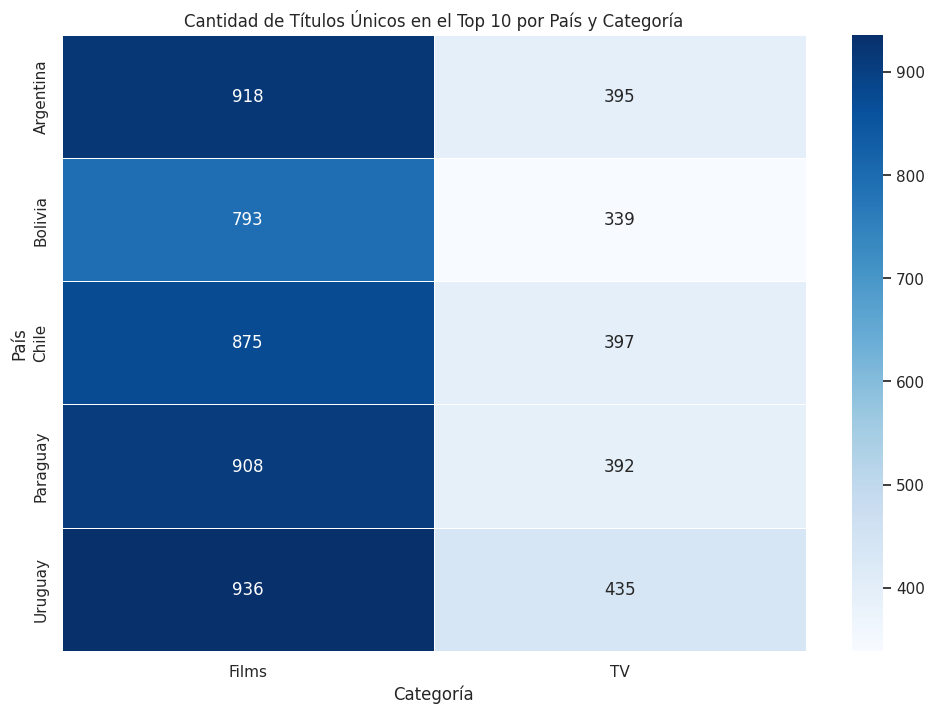

In [ ]:
# @title
#¿Cuáles son los países con mayor diversidad de contenido en el top 10 (cantidad de títulos únicos de diferentes categorías)?
#Mapa de Calor (Heatmap): Puedes mostrar la diversidad de contenido en el top 10 para cada país usando un mapa de calor.

# Crear un mapa de calor de títulos únicos por país y categoría
unique_titles_heatmap = df.pivot_table(index='country_name', columns='category', values='show_title', aggfunc='nunique').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(unique_titles_heatmap, annot=True, cmap="Blues", linewidths=.5, fmt=".0f")
plt.title('Cantidad de Títulos Únicos en el Top 10 por País y Categoría')
plt.xlabel('Categoría')
plt.ylabel('País')
plt.show()

<ipython-input-28-be170e2e58ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='cumulative_weeks_in_top_10', palette='coolwarm')


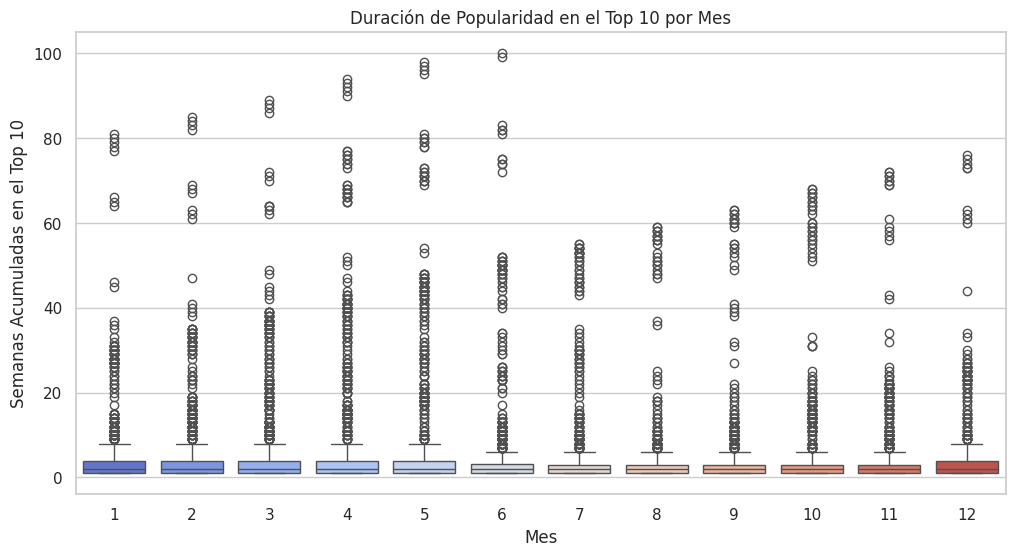

In [ ]:
# @title
# Extraer el mes de la semana en el DataFrame
df['month'] = pd.to_datetime(df['week'], errors='coerce').dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='cumulative_weeks_in_top_10', palette='coolwarm')
plt.title('Duración de Popularidad en el Top 10 por Mes')
plt.xlabel('Mes')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.show()

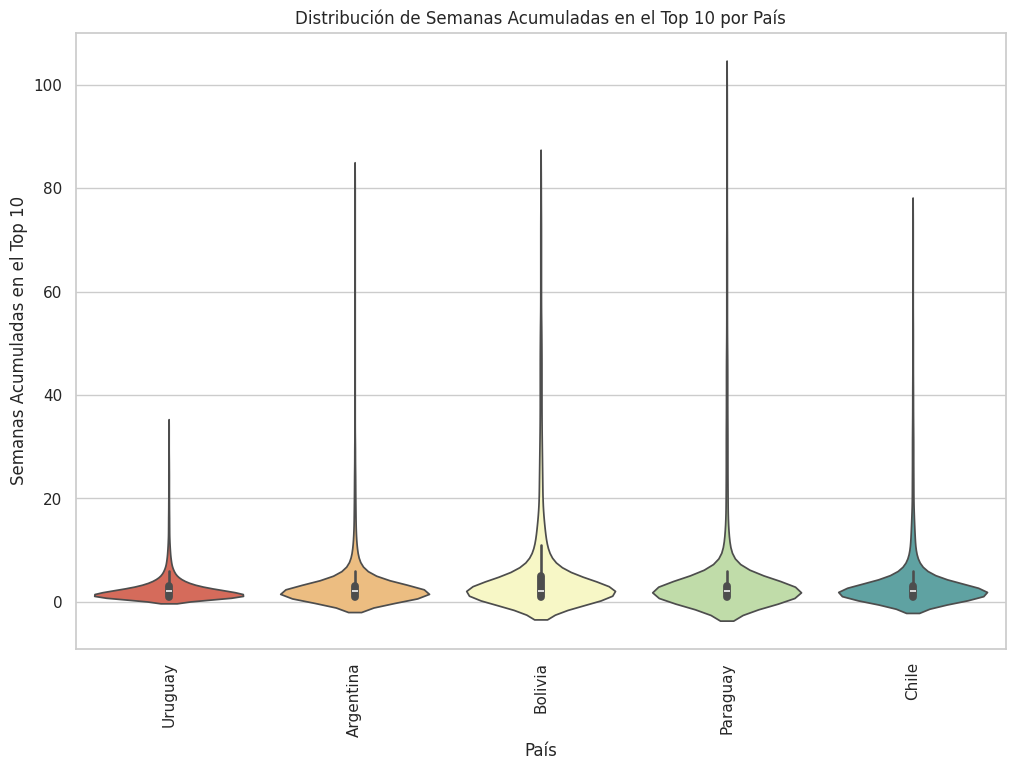

In [ ]:
# @title
#¿Cual es el pais que tiene mas semanas acumuladas en el TOP 10?
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='country_name', y='cumulative_weeks_in_top_10', hue='country_name', palette="Spectral", dodge=False, legend=False)
plt.title('Distribución de Semanas Acumuladas en el Top 10 por País')
plt.xlabel('País')
plt.ylabel('Semanas Acumuladas en el Top 10')
plt.xticks(rotation=90)
plt.show()

                               show_title  total_countries  \
0                 Café con aroma de mujer                5   
2                     Pasión de Gavilanes                5   
1               El Rey, Vicente Fernández                2   
3                           The Lulú Club                1   
4  Ángel Di María: Breaking Down the Wall                1   

                                 countries_list  
0  Argentina, Bolivia, Chile, Paraguay, Uruguay  
2  Argentina, Bolivia, Chile, Paraguay, Uruguay  
1                                Bolivia, Chile  
3                                         Chile  
4                                     Argentina  


<ipython-input-30-081b830b9b7d>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_titles_spanish.head(10), x='show_title', y='total_countries', palette='magma')


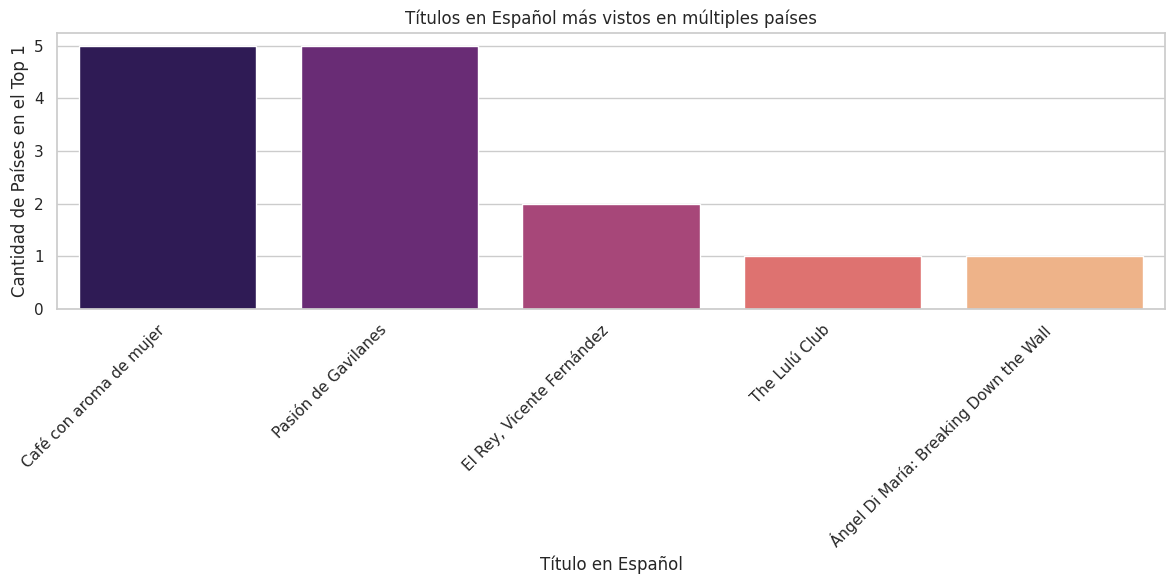

In [ ]:
# @title
import pandas as pd

# Asegúrate de tener tus datos en un DataFrame llamado 'netflix_data'

# Filtrar los títulos que han ocupado el primer lugar en el ranking semanal
top_titles = df[df['weekly_rank'] == 1]

# Filtrar solo títulos en español (basado en caracteres comunes del idioma)
spanish_titles = top_titles[top_titles['show_title'].str.contains(r'[áéíóúñÁÉÍÓÚÑ]', regex=True, na=False)]

# Contar cuántos países tienen el mismo título en el primer lugar
top_titles_count = spanish_titles.groupby(['show_title', 'country_name']).size().reset_index(name='count')

# Identificar títulos que fueron número 1 en múltiples países
popular_titles_spanish = top_titles_count.groupby('show_title').agg(
    total_countries=('country_name', 'nunique'),
    countries_list=('country_name', lambda x: ', '.join(x))
).reset_index()

# Ordenar por la cantidad de países en los que fue número 1
popular_titles_spanish = popular_titles_spanish.sort_values(by='total_countries', ascending=False)

# Mostrar los 10 títulos en español más populares en múltiples países
print(popular_titles_spanish.head(10))

# Visualización opcional para ver los resultados
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=popular_titles_spanish.head(10), x='show_title', y='total_countries', palette='magma')
plt.title('Títulos en Español más vistos en múltiples países')
plt.xlabel('Título en Español')
plt.ylabel('Cantidad de Países en el Top 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El porcentaje promedio de similitud en el top 10 entre países es: 62.71%


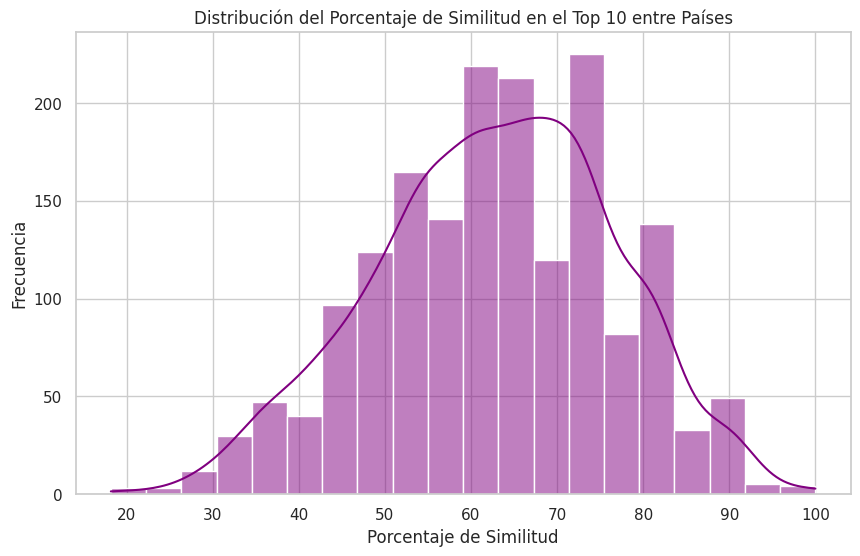

In [ ]:
# @title
# ¿Cual es el % de similitud en titulos del top 10 en los paises?
import pandas as pd
from itertools import combinations

# Asegúrate de tener tus datos en un DataFrame llamado 'netflix_data'

# Filtrar solo las filas relevantes (top 10 por país)
top_10_data = df[df['weekly_rank'] <= 10]

# Crear un diccionario para almacenar los sets de títulos por país y semana
country_weekly_titles = top_10_data.groupby(['country_name', 'week'])['show_title'].apply(set).reset_index()

# Calcular la similitud entre países
similarity_results = []

# Iterar sobre cada combinación de países
for (week, data) in country_weekly_titles.groupby('week'):
    countries = data['country_name'].tolist()
    titles_list = data['show_title'].tolist()

    # Comparar cada par de países usando el coeficiente de Jaccard
    for (i, j) in combinations(range(len(countries)), 2):
        country_i = countries[i]
        country_j = countries[j]
        set_i = titles_list[i]
        set_j = titles_list[j]

        # Calcular el coeficiente de Jaccard
        intersection = len(set_i.intersection(set_j))
        union = len(set_i.union(set_j))
        jaccard_similarity = intersection / union if union != 0 else 0

        # Almacenar el resultado
        similarity_results.append({
            'week': week,
            'country_1': country_i,
            'country_2': country_j,
            'similarity': jaccard_similarity * 100  # convertir a porcentaje
        })

# Convertir los resultados en un DataFrame
similarity_df = pd.DataFrame(similarity_results)

# Calcular el promedio de similitud entre todos los pares de países
average_similarity = similarity_df['similarity'].mean()

# Mostrar el resultado
print(f"El porcentaje promedio de similitud en el top 10 entre países es: {average_similarity:.2f}%")

# Visualizar la distribución de similitudes con un gráfico opcional
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(similarity_df['similarity'], bins=20, kde=True, color='purple')
plt.title('Distribución del Porcentaje de Similitud en el Top 10 entre Países')
plt.xlabel('Porcentaje de Similitud')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Top 10 pares de países con mayor similitud en el Top 10:
   country_1 country_2  similarity
3  Argentina   Uruguay   78.490208
7      Chile  Paraguay   74.018140
2  Argentina  Paraguay   69.161199
1  Argentina     Chile   67.334061
9   Paraguay   Uruguay   63.578108
4    Bolivia     Chile   63.120855
5    Bolivia  Paraguay   60.069525
8      Chile   Uruguay   59.995569
0  Argentina   Bolivia   48.892521
6    Bolivia   Uruguay   42.443945


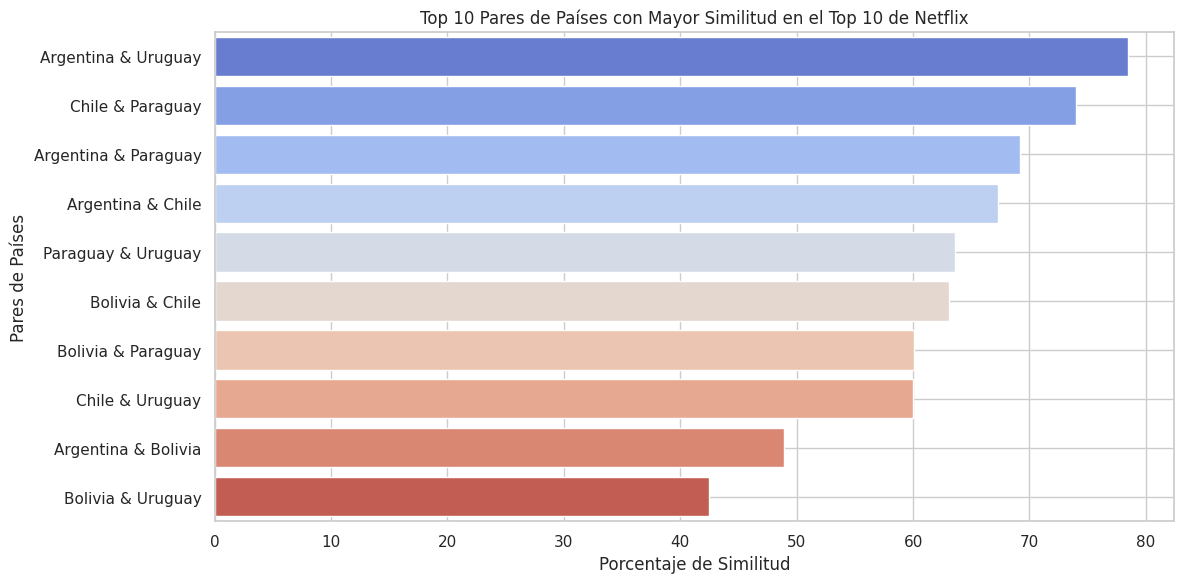

In [ ]:
# @title
import pandas as pd
from itertools import combinations

# Asegúrate de tener tus datos en un DataFrame llamado 'netflix_data'

# Filtrar solo las filas relevantes (top 10 por país)
top_10_data = df[df['weekly_rank'] <= 10]

# Crear un diccionario para almacenar los sets de títulos por país y semana
country_weekly_titles = top_10_data.groupby(['country_name', 'week'])['show_title'].apply(set).reset_index()

# Calcular la similitud entre países
similarity_results = []

# Iterar sobre cada combinación de países para cada semana
for (week, data) in country_weekly_titles.groupby('week'):
    countries = data['country_name'].tolist()
    titles_list = data['show_title'].tolist()

    # Comparar cada par de países usando el coeficiente de Jaccard
    for (i, j) in combinations(range(len(countries)), 2):
        country_i = countries[i]
        country_j = countries[j]
        set_i = titles_list[i]
        set_j = titles_list[j]

        # Calcular el coeficiente de Jaccard
        intersection = len(set_i.intersection(set_j))
        union = len(set_i.union(set_j))
        jaccard_similarity = intersection / union if union != 0 else 0

        # Almacenar el resultado
        similarity_results.append({
            'week': week,
            'country_1': country_i,
            'country_2': country_j,
            'similarity': jaccard_similarity * 100  # convertir a porcentaje
        })

# Convertir los resultados en un DataFrame
similarity_df = pd.DataFrame(similarity_results)

# Identificar los pares de países con la mayor similitud promedio
top_similar_pairs = similarity_df.groupby(['country_1', 'country_2'])['similarity'].mean().reset_index()
top_similar_pairs = top_similar_pairs.sort_values(by='similarity', ascending=False)

# Mostrar los 10 pares de países con mayor similitud
print("Top 10 pares de países con mayor similitud en el Top 10:")
print(top_similar_pairs.head(10))


import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna combinando los nombres de los países para usar en el gráfico
top_similar_pairs['country_pair'] = top_similar_pairs['country_1'] + ' & ' + top_similar_pairs['country_2']


plt.figure(figsize=(12, 6))
sns.barplot(data=top_similar_pairs.head(10), x='similarity', y='country_pair', hue='country_pair', palette='coolwarm')
plt.title('Top 10 Pares de Países con Mayor Similitud en el Top 10 de Netflix')
plt.xlabel('Porcentaje de Similitud')
plt.ylabel('Pares de Países')
plt.grid(True)
plt.tight_layout()
plt.show()